In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls

def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    x = data[:,0]
    y = data[:,1]
    return x, y

def Least_squares(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.figure(figsize=(16,14))
    plt.plot(x, y, 'o', label="Original Data", markersize=2)
    plt.plot(x, m*x + c, "r", label="Fitted Line")
    plt.legend()
    plt.show()

Loading the data

In [3]:
X = np.array(Read_file("takens_1"))

## 1) Embedding  a  periodic  signal  into  a  state  space 

### a) Plot against time

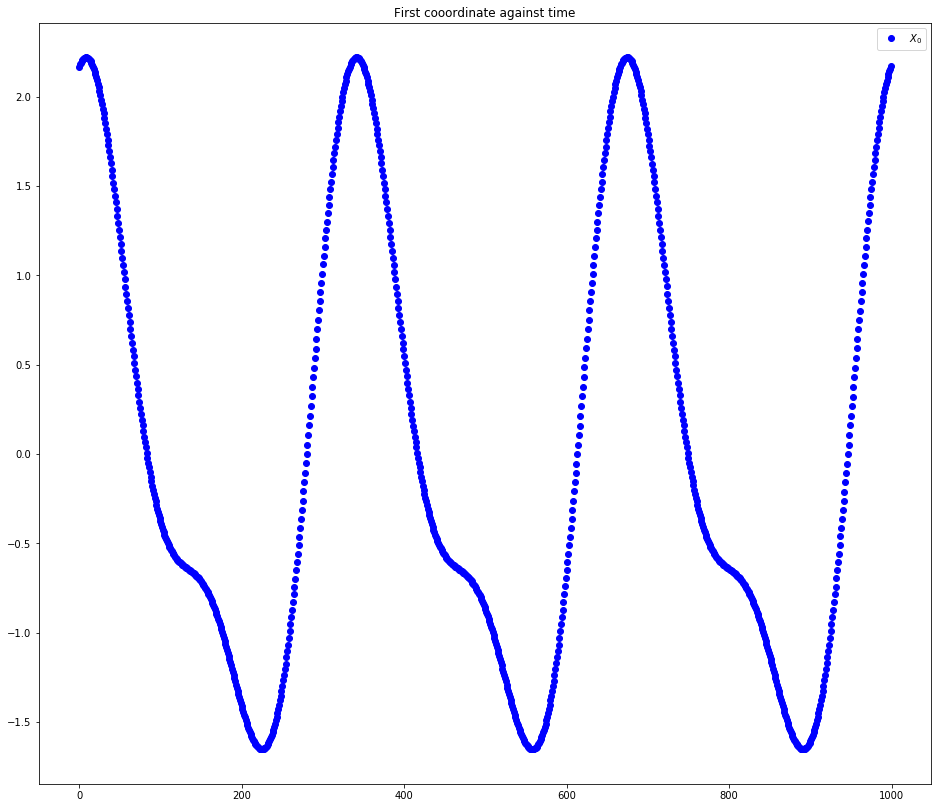

In [5]:
time = range(X.shape[1])
plt.figure(figsize=(16,14))
plt.title('First cooordinate against time')
plt.plot(time,X[0,:], 'o', label=r"$X_0$", color="blue")
plt.legend()
plt.show()

### b) Plot the coordinate against its delayed version

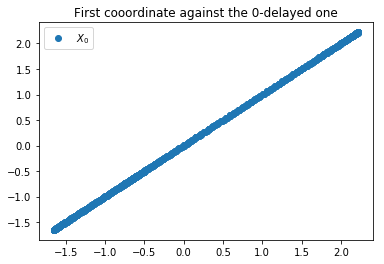

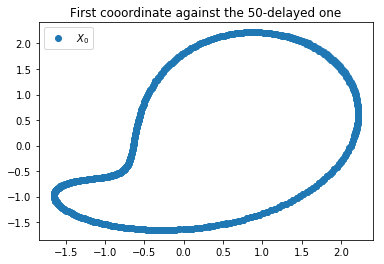

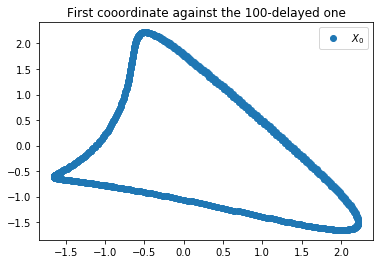

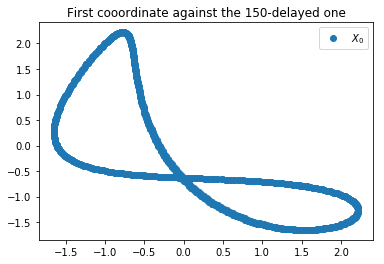

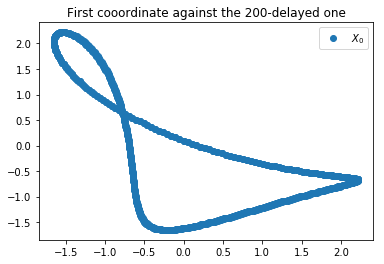

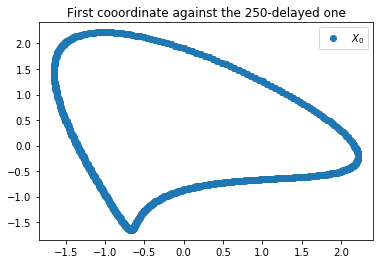

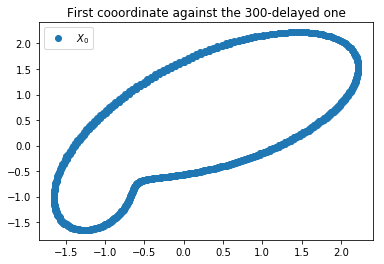

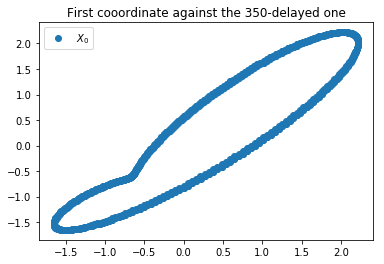

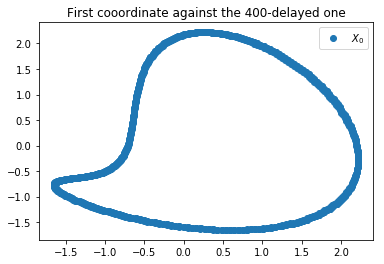

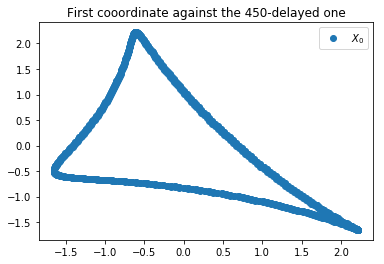

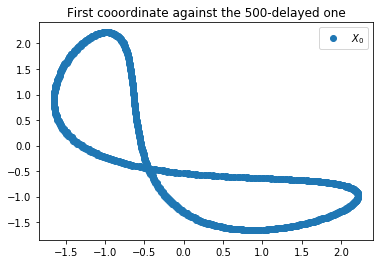

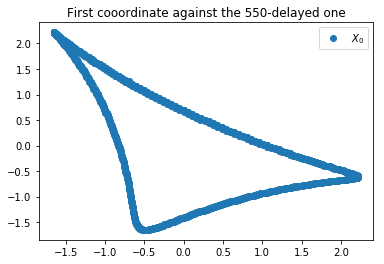

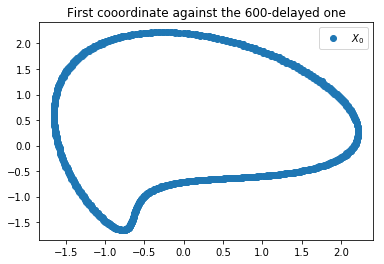

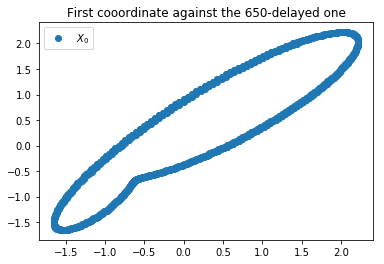

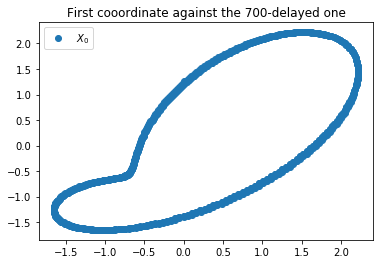

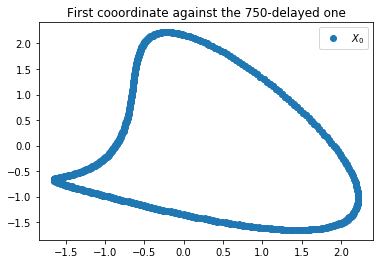

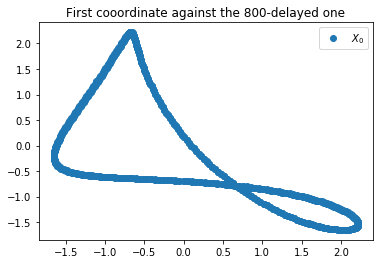

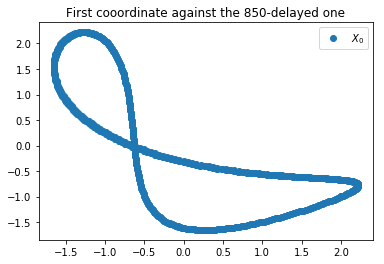

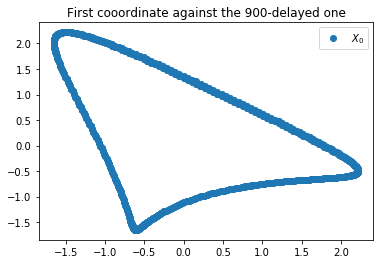

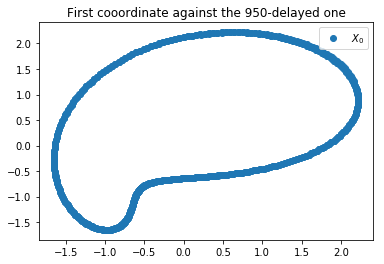

In [14]:
dn = 10
for dn in range(0,1000,50) : 
    delayed = np.array(list(X[0,dn:])+list(X[0,:dn]))
    plt.figure()
    plt.title('First cooordinate against the '+ str(dn)+'-delayed one')
    plt.plot(delayed,X[0,:], 'o', label=r"$X_0$")
    plt.legend()
    plt.show()
